In [32]:
import pandas as pd
import glob
import os

In [33]:
path = r"clean dataset"
csv_files = glob.glob(os.path.join(path, "*.csv"))

dataframes = {}
for file in csv_files:
    df_name = os.path.basename(file).replace(".csv", "")
    dataframes[df_name] = pd.read_csv(file, sep=';')

def clean_dataframe(df):
    # Drop columns that are all NaN or empty
    df = df.dropna(axis=1, how='all')
    # Identify date columns
    date_cols = [col for col in df.columns if 'Date' in col or 'Day' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    # Convert numeric columns
    for col in df.columns:
        if col not in date_cols:
            if df[col].dtype == 'object':
                try:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
                except:
                    pass
            elif df[col].dtype in ['int64', 'float64']:
                # Ensure appropriate type
                if (df[col] % 1 == 0).all():
                    df[col] = df[col].astype('int64')
                else:
                    df[col] = df[col].astype('float64')
    return df

# Clean all dataframes
for name in dataframes:
    dataframes[name] = clean_dataframe(dataframes[name])

print("Imported and cleaned datasets:")
for name in dataframes:
    print(f"- {name}: {dataframes[name].shape}")
    print(f"  Columns: {list(dataframes[name].columns)}")
    print(f"  Dtypes:\n{dataframes[name].dtypes}")
    print()



Imported and cleaned datasets:
- dailyActivity: (862, 15)
  Columns: ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
  Dtypes:
Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories          

C:\Users\91994\AppData\Local\Temp\ipykernel_14668\2692096575.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\91994\AppData\Local\Temp\ipykernel_14668\2692096575.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('int64')
C:\Users\91994\AppData\Local\Temp\ipykernel_14668\2692096575.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


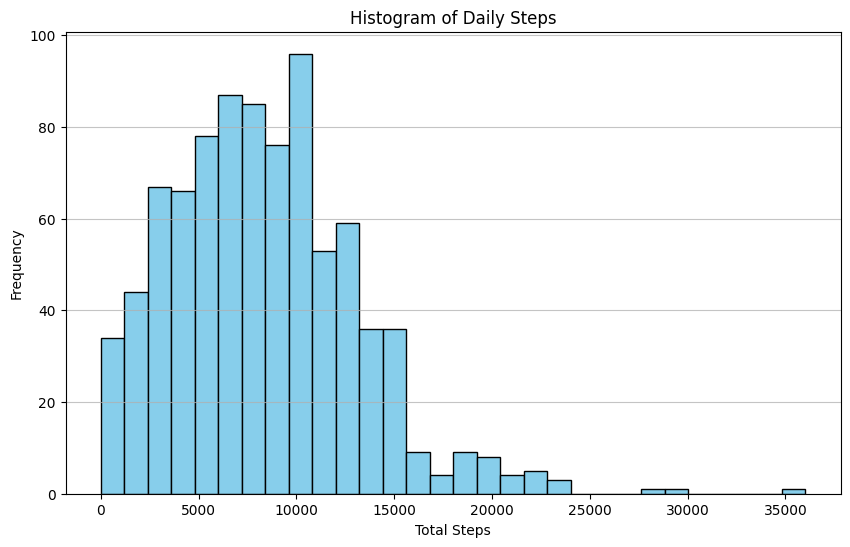

In [ ]:
#  histogram of Daily Steps from dailyActivity dataset
if "dailyActivity" in dataframes:
    df = dataframes["dailyActivity"]
    if "TotalSteps" in df.columns:
        plt.figure(figsize=(10,6))
        plt.hist(df["TotalSteps"].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title("Histogram of Daily Steps")
        plt.xlabel("Total Steps")
        plt.ylabel("Frequency")
        plt.grid(axis='y', alpha=0.75)
        plt.show()



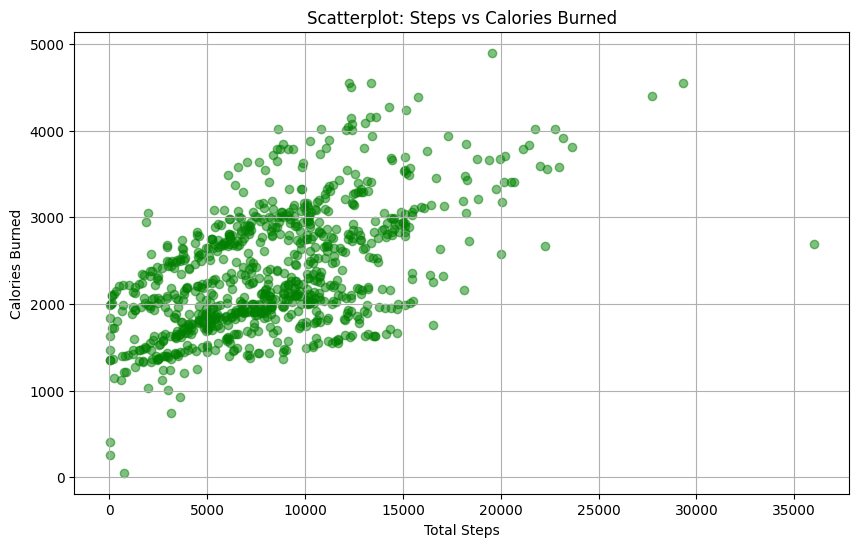

In [ ]:
#  scatterplot of Steps vs Calories Burned
if "dailyActivity" in dataframes:
    df = dataframes["dailyActivity"]
    if "TotalSteps" in df.columns and "Calories" in df.columns:
        plt.figure(figsize=(10,6))
        plt.scatter(df["TotalSteps"], df["Calories"], alpha=0.5, color='green')
        plt.title("Scatterplot: Steps vs Calories Burned")
        plt.xlabel("Total Steps")
        plt.ylabel("Calories Burned")
        plt.grid(True)
        plt.show()



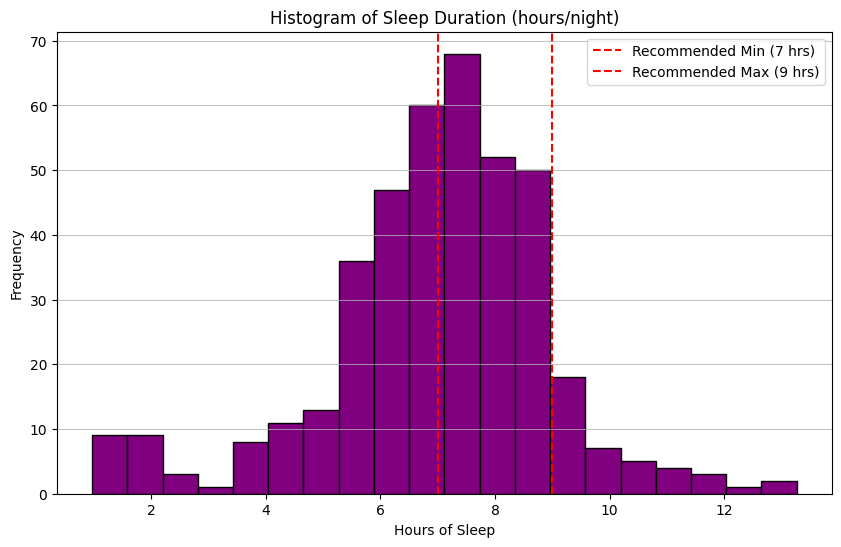

In [ ]:
#  histogram of Sleep Duration (hours/night)
if "SleepDay" in dataframes:
    df = dataframes["SleepDay"]
    if "TotalMinutesAsleep" in df.columns:
        df = df.dropna(subset=["TotalMinutesAsleep"])
        sleep_hours = df["TotalMinutesAsleep"] / 60.0
        plt.figure(figsize=(10,6))
        plt.hist(sleep_hours, bins=20, color='purple', edgecolor='black')
        plt.axvline(x=7, color='red', linestyle='--', label='Recommended Min (7 hrs)')
        plt.axvline(x=9, color='red', linestyle='--', label='Recommended Max (9 hrs)')
        plt.title("Histogram of Sleep Duration (hours/night)")
        plt.xlabel("Hours of Sleep")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(axis='y', alpha=0.75)
        plt.show()



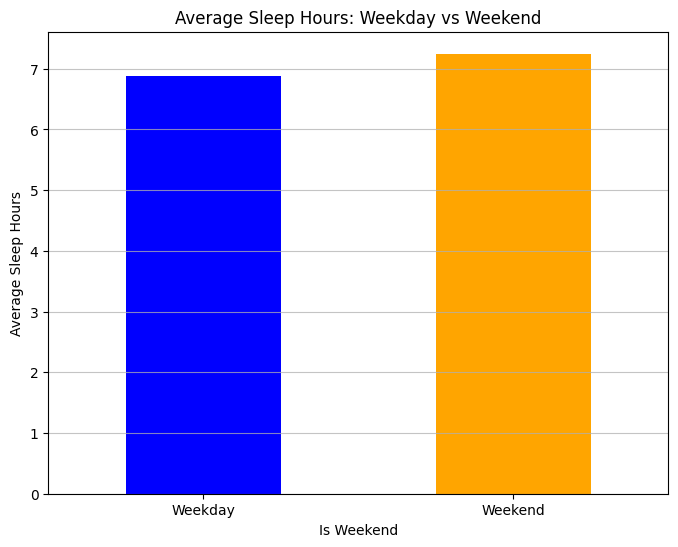

In [ ]:
#  bar chart: Weekday vs Weekend Sleep
if "SleepDay" in dataframes:
    df = dataframes["SleepDay"]
    if "SleepDay" in df.columns and "TotalMinutesAsleep" in df.columns:
        df = df.dropna(subset=["SleepDay", "TotalMinutesAsleep"])
        df["SleepDay"] = pd.to_datetime(df["SleepDay"])
        df["DayOfWeek"] = df["SleepDay"].dt.day_name()
        df["IsWeekend"] = df["DayOfWeek"].isin(["Saturday", "Sunday"])
        df["SleepHours"] = df["TotalMinutesAsleep"] / 60.0
        avg_sleep = df.groupby("IsWeekend")["SleepHours"].mean()
        plt.figure(figsize=(8,6))
        avg_sleep.plot(kind='bar', color=['blue', 'orange'])
        plt.title("Average Sleep Hours: Weekday vs Weekend")
        plt.xlabel("Is Weekend")
        plt.ylabel("Average Sleep Hours")
        plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
        plt.grid(axis='y', alpha=0.75)
        plt.show()



<Figure size 1000x600 with 0 Axes>

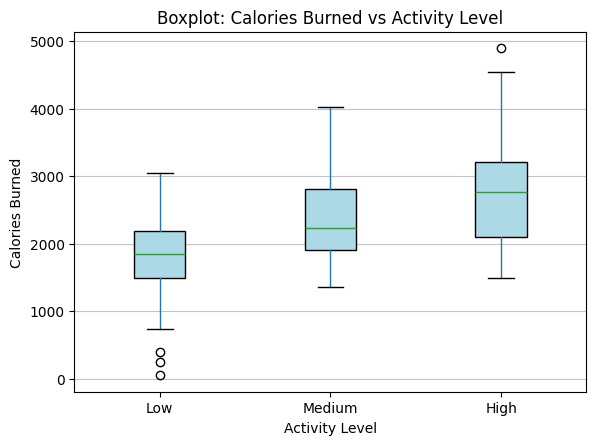

In [ ]:
#  boxplot: Calories Burned vs Activity Level (low/medium/high)
if "dailyActivity" in dataframes:
    df = dataframes["dailyActivity"]
    if "TotalSteps" in df.columns and "Calories" in df.columns:
        df = df.dropna(subset=["TotalSteps", "Calories"])
        df["ActivityLevel"] = pd.cut(df["TotalSteps"], bins=[0, 5000, 10000, float('inf')], labels=['Low', 'Medium', 'High'])
        plt.figure(figsize=(10,6))
        df.boxplot(column="Calories", by="ActivityLevel", grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.title("Boxplot: Calories Burned vs Activity Level")
        plt.suptitle('')
        plt.xlabel("Activity Level")
        plt.ylabel("Calories Burned")
        plt.grid(axis='y', alpha=0.75)
        plt.show()



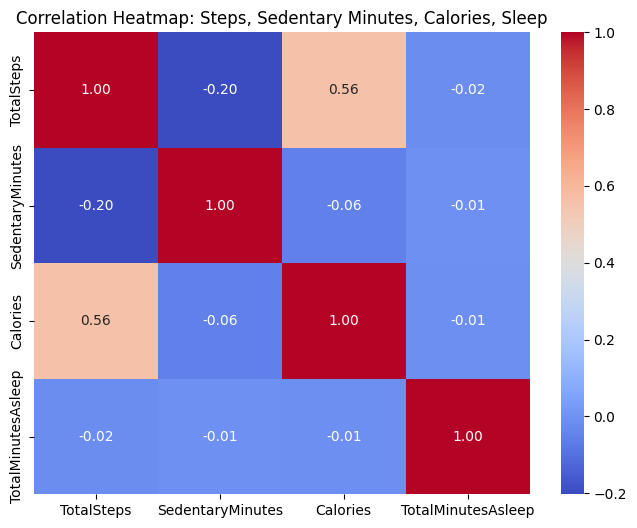

In [ ]:
#  correlation heatmap: Steps, Sedentary Minutes, Calories, Sleep
if "dailyActivity" in dataframes and "SleepDay" in dataframes:
    df_activity = dataframes["dailyActivity"]
    df_sleep = dataframes["SleepDay"]
    # Merge on date if possible
    if "ActivityDate" in df_activity.columns and "SleepDay" in df_sleep.columns:
        df_sleep_renamed = df_sleep.rename(columns={"SleepDay": "ActivityDate"})
        df_sleep_renamed["ActivityDate"] = pd.to_datetime(df_sleep_renamed["ActivityDate"])
        df_activity["ActivityDate"] = pd.to_datetime(df_activity["ActivityDate"])
        merged_df = pd.merge(df_activity, df_sleep_renamed, on="ActivityDate", how="inner")
        cols_of_interest = ["TotalSteps", "SedentaryMinutes", "Calories", "TotalMinutesAsleep"]
        corr_df = merged_df[cols_of_interest].dropna()
        corr_matrix = corr_df.corr()
        plt.figure(figsize=(8,6))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap: Steps, Sedentary Minutes, Calories, Sleep")
        plt.show()



<Figure size 1200x800 with 0 Axes>

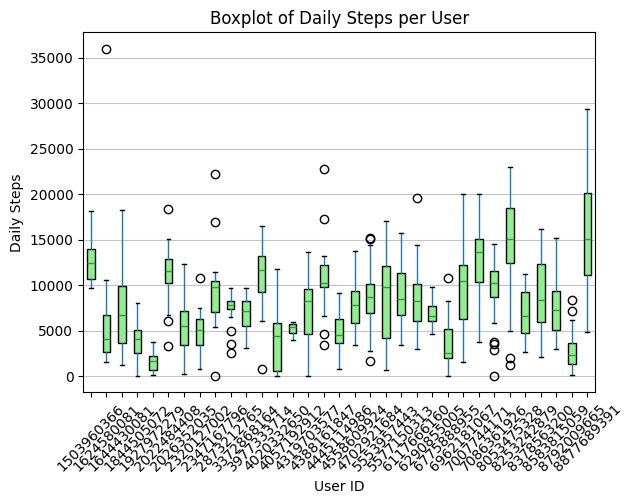

In [ ]:
#  boxplot of Daily Steps per User
if "dailyActivity" in dataframes:
    df = dataframes["dailyActivity"]
    if "Id" in df.columns and "TotalSteps" in df.columns:
        df = df.dropna(subset=["Id", "TotalSteps"])
        plt.figure(figsize=(12,8))
        df.boxplot(column="TotalSteps", by="Id", grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
        plt.title("Boxplot of Daily Steps per User")
        plt.suptitle('')
        plt.xlabel("User ID")
        plt.ylabel("Daily Steps")
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.75)
        plt.show()



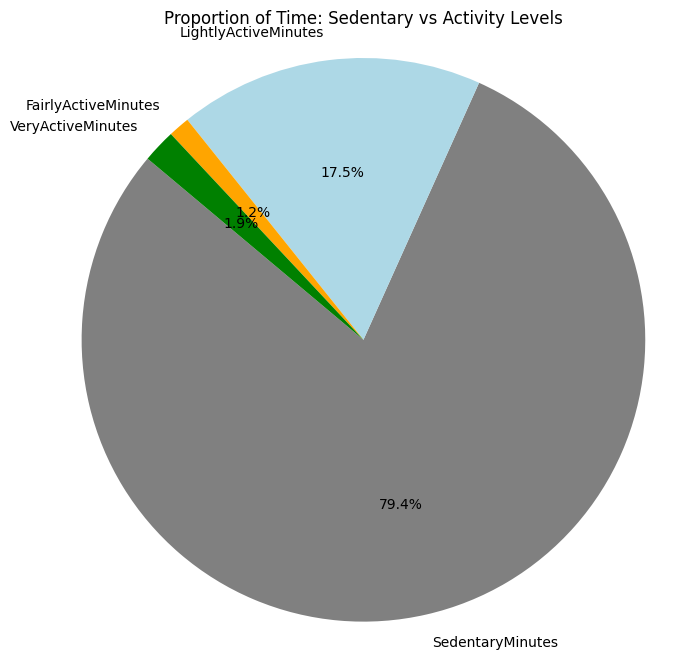

In [ ]:
#  pie chart: Proportion of Time (Sedentary, Lightly, Fairly, Very Active)
if "dailyActivity" in dataframes:
    df = dataframes["dailyActivity"]
    activity_cols = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    if all(col in df.columns for col in activity_cols):
        total_time = df[activity_cols].sum()
        plt.figure(figsize=(8,8))
        plt.pie(total_time, labels=activity_cols, autopct='%1.1f%%', startangle=140, colors=['gray', 'lightblue', 'orange', 'green'])
        plt.title("Proportion of Time: Sedentary vs Activity Levels")
        plt.axis('equal')
        plt.show()